# <b> <font color = blue>Cost Function for Logistic Regression<font> </b>

In [14]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import sys
sys.path.append("Material_By_DeepLearning/")
from lab_utils_common import sigmoid, dlc
plt.style.use('./Material_By_DeepLearning/deeplearning.mplstyle')

In [15]:
#dataset
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1]) 

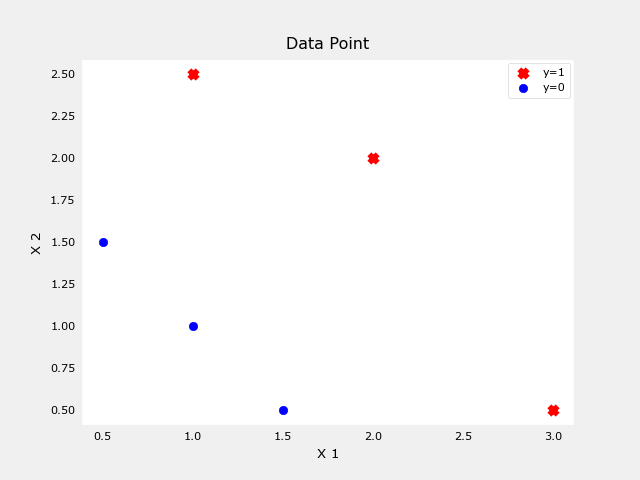

In [21]:
# lets plot the data 
pos = y_train == 1
neg = y_train == 0

_,ax = plt.subplots(1,1)
ax.scatter(X_train[pos,0], X_train[pos,1], c="red", marker="x", label="y=1")
ax.scatter(X_train[neg,0], X_train[neg,1], c="blue", marker="o", label="y=0")
ax.set_title("Data Point")
ax.set_xlabel("X 1")
ax.set_ylabel("X 2")
ax.legend()

plt.show()

## Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$
 
 
<a name='ex-02'></a>
#### Code Description

The algorithm for `Compute_Cost_Logistics` loops over all the examples calculating the loss for each example and accumulating the total.

Note that the variables X and y are not scalar values but matrices of shape ($m, n$) and ($𝑚$,) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.


In [42]:
def Sigmoid(z):
    return (1/(1+np.exp(-z)))

In [43]:
def Compute_Cost_Logistics(x, y, w, b, Sigmoid):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    cost = 0
    m = x.shape[0]
    for i in range(0,m):
        z = np.dot(w,x[i])+b
        f_wb = Sigmoid(z)
        cost += (y[i]*np.log(f_wb)) + ((1-y[i])*(np.log(1 - f_wb)))
        
    cost = - (cost/m)
    return cost
        

In [45]:
w = np.array([1,1])
b = -3
print(Compute_Cost_Logistics(X_train, y_train, w, b, Sigmoid))

0.36686678640551745


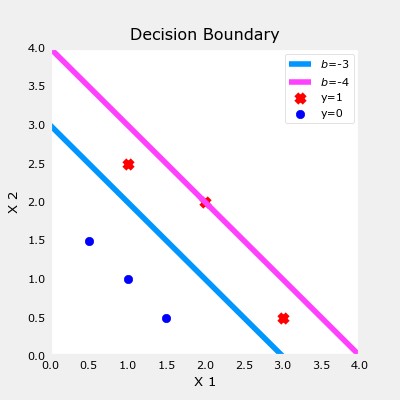

In [48]:

# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c=dlc["dlblue"], label="$b$=-3")
ax.plot(x0,x1_other, c=dlc["dlmagenta"], label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data

ax.scatter(X_train[pos,0], X_train[pos,1], c="red", marker="x", label="y=1")
ax.scatter(X_train[neg,0], X_train[neg,1], c="blue", marker="o", label="y=0")
ax.set_title("Data Point")
ax.set_xlabel("X 1")
ax.set_ylabel("X 2")
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [51]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", Compute_Cost_Logistics(X_train, y_train, w_array1, b_1,Sigmoid))
print("Cost for b = -4 : ", Compute_Cost_Logistics(X_train, y_train, w_array2, b_2,Sigmoid))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461
